In [1]:
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced visualization
# Scikit-Learn for Model Training & Evaluation
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Data preprocessing
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc  # ROC and AUC
from sklearn.metrics import confusion_matrix, classification_report  # Performance metrics

In [5]:
#Step 1 - Load Data 
df=pd.read_csv("heart (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


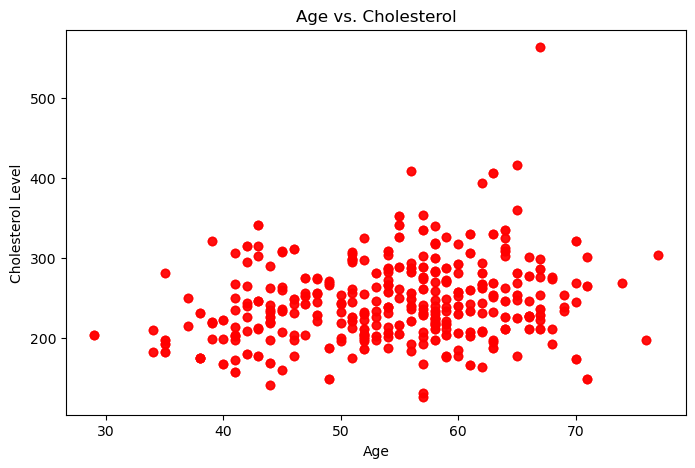

In [13]:

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['chol'], color='red', alpha=0.6)

# Labels and title
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Age vs. Cholesterol')

# Show plot
plt.show()


In [15]:
x=df.drop('target',axis = 1)
y=df.target

In [33]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

 Why Higher Dimensions Help
 
✅ More space to separate points → Higher dimensions create room to find a perfect boundary.

✅ Simple separation using hyperplanes → A non-linear problem in lower dimensions becomes a linear problem in higher dimensions.

✅ Avoids overfitting → SVM still finds the optimal margin for classification.

In [51]:
# Import necessary libraries
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Create an SVM Classifier
ml = svm.SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [1, 10, 100, 1000, 10000],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
    'kernel': ['rbf']  # Using only the RBF kernel
}

# Create GridSearchCV (Fixing the typo in 'GridSearchc')
grid = GridSearchCV(ml, param_grid, refit=True, verbose=1, cv=15)

# Fit the model using GridSearchCV (Fixing the typo in 'grid search-grid.fit')
grid.fit(x_train, y_train)

# Print the best parameters
print("Best Parameters:", grid.best_params_)

# Get the best model
best_svm = grid.best_estimator_


Fitting 15 folds for each of 25 candidates, totalling 375 fits
Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [77]:
# Get the best model from GridSearchCV
best_model = grid.best_estimator_

# Predict on the test set
y_pred = best_model.predict(x_test)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Print accuracy
print("Accuracy on test dataset after tuning: {:.2f}%".format(test_accuracy))


Accuracy on test dataset after tuning: 100.00%


In [81]:
# Get the best cross-validation score from GridSearchCV
best_score = grid.best_score_

# Print Best Cross-Validation Score
print("Best Cross-Validation Score:", best_score)


Best Cross-Validation Score: 0.9817059483726152


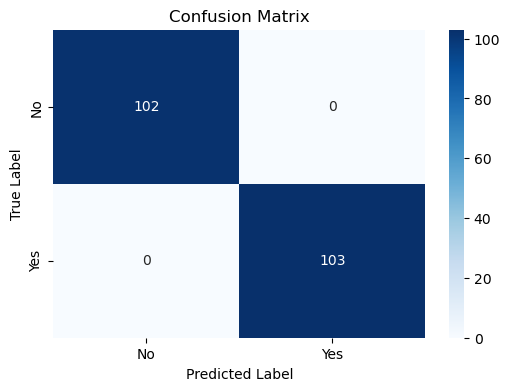

In [83]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))  # Correct way to set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
DATASET

In [85]:
# Load datasets
train_df = pd.read_csv("loan-train.csv")
test_df = pd.read_csv("loan-test.csv")


In [111]:
print(test_df.columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [87]:

# Drop Loan_ID as it's not useful for prediction
train_df.drop(columns=['Loan_ID'], inplace=True)
test_df.drop(columns=['Loan_ID'], inplace=True)

In [89]:
# Encode categorical variables
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    encoder = LabelEncoder()
    train_df[col] = encoder.fit_transform(train_df[col].astype(str))
    if col in test_df.columns:
        test_df[col] = encoder.transform(test_df[col].astype(str))


In [91]:
# Convert "Dependents" column to numeric, replacing "3+" with 3
train_df["Dependents"] = train_df["Dependents"].replace("3+", 3).astype(float)
test_df["Dependents"] = test_df["Dependents"].replace("3+", 3).astype(float)

In [93]:
# Handle missing values (fill with median for numerical columns)
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)


In [121]:

# Separate features and target
X = train_df.drop(columns=["Loan_Status"])  # Assuming "Loan_Status" is the target
y = train_df["Loan_Status"]

In [123]:

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [97]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [99]:

# Define SVM model and hyperparameter grid
svm_model = SVC()
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [101]:

# Grid Search with Cross Validation
grid = GridSearchCV(svm_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=1)

In [141]:
# Predict and evaluate
y_pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.8617886178861789

In [105]:

# Print results
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
if y_test is not None:
    print("Test Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best Score: 0.8111155537784887


In [115]:
# Get the best cross-validation score from GridSearchCV
best_score = grid.best_score_

# Print Best Cross-Validation Score
print("Best Cross-Validation Score:", best_score)


Best Cross-Validation Score: 0.8111155537784887


In [127]:
print(len(X_test), len(y_test))


123 123


In [129]:
print(len(y_pred))


367


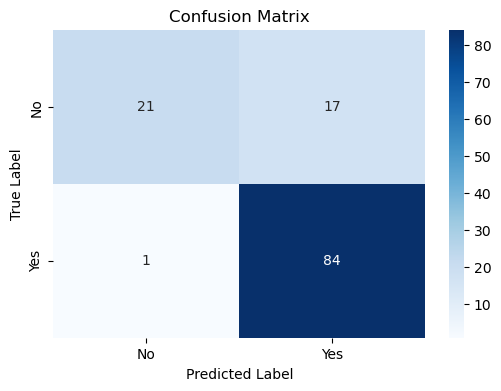

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
